In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
image_name = []
image_label = []

for folder in os.listdir('Dataset/covid_ctscan/New_Data_CoV2'):
    data_folder = 'Dataset/covid_ctscan/New_Data_CoV2/' + folder
    for subfolder in os.listdir(data_folder):
        sub_folder = data_folder + '/' + subfolder
        for files in os.listdir(sub_folder):
            filename, fileextension = os.path.splitext(files)
            
            if(fileextension == '.png'):
                file_path = sub_folder + '/' + files
                image_name.append(file_path)
                image_label.append(folder)

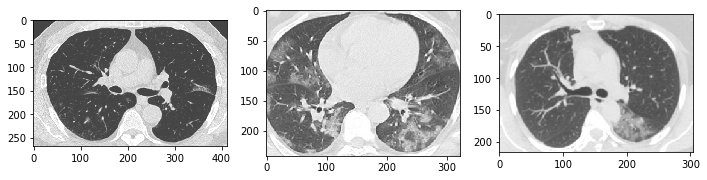

In [3]:
#Matplotlib image show
plt.figure(figsize=(16,16))
plt.subplot(141)
plt.imshow(cv2.imread(image_name[0]))

plt.subplot(142)
plt.imshow(cv2.imread(image_name[100]))

plt.subplot(143)
plt.imshow(cv2.imread(image_name[200]))
plt.show()


In [4]:
def process_image():
    #Return two array. One of resize images and other of array of labels
    x = []  # array of images
    y = []  # array of labels
    WIDTH = 32
    HEIGHT = 32
    for img, label in zip(image_name, image_label):
        #Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image,(WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC))
        # Labels
        if(label=='Covid'):
            value = 0
            y.append(value)
        elif(label=='Healthy'):
            value = 1
            y.append(value)
        else:
            value = 2
            y.append(value)
        
        
        
    return x,y

In [5]:
x,y = process_image()

In [6]:
x = np.asarray(x)
y = np.asarray(y)
print('Shape of x: ',x.shape, '  Shape of y: ', y.shape)
print('Dimension of x: ', x.ndim, '  Dimension of y: ', y.ndim)

Shape of x:  (4171, 32, 32, 3)   Shape of y:  (4171,)
Dimension of x:  4   Dimension of y:  1


In [7]:
#split dataset in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print('Shape of X_train: ',X_train.shape, '  Shape of y_train: ', y_train.shape)
print('Shape of X_test: ',X_test.shape, '  Shape of y_test: ', y_test.shape)

Shape of X_train:  (3336, 32, 32, 3)   Shape of y_train:  (3336,)
Shape of X_test:  (835, 32, 32, 3)   Shape of y_test:  (835,)


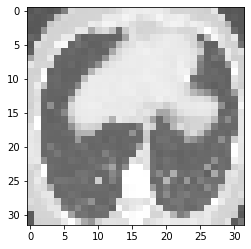

In [8]:
plt.imshow(X_train[0])
plt.show()

In [10]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [11]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#CONSTANT
BATCH_SIZE = 5
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.15
OPTIM = RMSprop()  # Other optimizers are SGD, Adam, Adagrad

In [12]:
#convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
#model
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [14]:
#train
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,  metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, validation_split = VALIDATION_SPLIT,
          verbose = VERBOSE)

score = model.evaluate(X_test, Y_test,batch_size = BATCH_SIZE,verbose = VERBOSE)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Train on 2835 samples, validate on 501 samples
Epoch 1/10
2835/2835 [==============================] - 46s 16ms/step - loss: 0.9535 - accuracy: 0.5527 - val_loss: 0.9016 - val_accuracy: 0.5868
Epoch 2/10
2835/2835 [==============================] - 43s 15ms/step - loss: 0.7813 - accuracy: 0.6487 - val_loss: 0.7743 - val_accuracy: 0.6487
Epoch 3/10
2835/2835 [==============================] - 42s 15ms/step - loss: 0.6945 - accuracy: 0.7069 - val_loss: 0.7461 - val_accuracy: 0.6766
Epoch 4/10
2835/2835 [==============================] - 42s 15ms/step - loss: 0.6682 - accuracy: 0.7146 - val_loss: 0.7647 - val_accuracy: 0.6587
Epoch 5/10
2835/2835 [==============================] - 43s 15ms/step - loss: 0.6245 - accuracy: 0.7414 - val_loss: 1.0091 - val_accuracy: 0.6806
Epoch 6/10
2835/2835 [==============================] - 43s 15ms/step - loss: 0.5889 - accuracy: 0.7552 - val_loss: 0.8128 - val_accuracy: 0.6627
Epoch 7/10
2835/2835 [==============================] - 44s 15ms/step - loss:

Now, Validation accuracy is 0.6826 and Test Accuracy is 0.7066 .
Accuracy may increase if the no of epochs increases or another optimizer is used or BATCH_SIZE is changed.